In [22]:
#import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors as colors
from matplotlib import rc
plt.rcParams["font.serif"]       = 'Times New Roman'
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["xtick.labelsize"]  = 25
plt.rcParams["ytick.labelsize"]  = 25

plt.rcParams["legend.title_fontsize"]=25
import sys

In [101]:
hbar=1.06e-34
q=1.6e-19
m=0.25*9.1e-31
IE=q*q/(2*np.pi*hbar)
Ef=0.1
kT=0.025
a=3e-10
t0=(hbar**2)/(2*m*a**2*q)

In [102]:
#No barrier
NS=15
NC=30
ND=15
Np=NS+NC+ND
UB=np.ones(Np)*0

#Tunneling barrier
NS=23
NC=4
ND=23
Np=NS+NC+ND
UB=np.concatenate((np.zeros(NS),0.4*np.ones(NC),np.zeros(ND)),axis=None)

In [103]:
#Construct hamiltonian
H=2*t0*np.diag(np.ones(Np)) - t0*np.diag(np.ones(Np-1),1) - t0*np.diag(np.ones(Np-1),-1)
H=H+np.diag(UB)
print(H)

[[ 3.42979243 -1.71489621  0.         ...  0.          0.
   0.        ]
 [-1.71489621  3.42979243 -1.71489621 ...  0.          0.
   0.        ]
 [ 0.         -1.71489621  3.42979243 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  3.42979243 -1.71489621
   0.        ]
 [ 0.          0.          0.         ... -1.71489621  3.42979243
  -1.71489621]
 [ 0.          0.          0.         ...  0.         -1.71489621
   3.42979243]]


In [104]:
#Specify bias
V=0
mu1=Ef+V/2
mu2=Ef-V/2
U1=V*np.concatenate((0.5*np.ones(NS),np.linspace(0.5,-0.5,NC), -0.5*np.ones(ND)),axis=None)
U1=U1.conj().T #applied potential profile
print(U1)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


In [111]:
#Energy grid
NE=501
E=np.linspace(-0.2,0.8,NE)
zplus=1j*1e-12
dE=E[2]-E[1]
f1=1./(1.+np.exp(E-mu1)/kT)
f2=1./(1.+np.exp(E-mu2)/kT)
TM=np.zeros(NE,dtype=complex)
print(TM)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.

In [125]:
#Transmission
I=0 #Current
for k in range(0,NE):
    sig1=np.zeros((Np,Np),dtype=complex)
    sig2=np.zeros((Np,Np),dtype=complex)
#    sig3=np.zeros((Np,Np),dtype=complex)
    ck = 1.-((E[k]+zplus-U1[0]-UB[0])/(2*t0))
    ka = np.arccos(ck)
    sig1[0][0]=-t0*np.exp(1j*ka)
    gam1=1j*(sig1 - sig1.conj().T)
    
    ck = 1.-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0))
    ka = np.arccos(ck)
    sig2[Np-1][Np-1]=-t0*np.exp(1j*ka)
    gam2=1j*(sig2 - sig2.conj().T)  
    
    G=np.linalg.inv((E[k]+zplus)*np.eye(Np)- H - np.diag(U1) - sig1 - sig2)
    
    TM[k]=(np.trace(gam1*G*gam2*G.conj().T))
    
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]))

In [126]:
print('Voltage, V: ', V)
print('Current, I: ', I)

Voltage, V:  0
Current, I:  0j


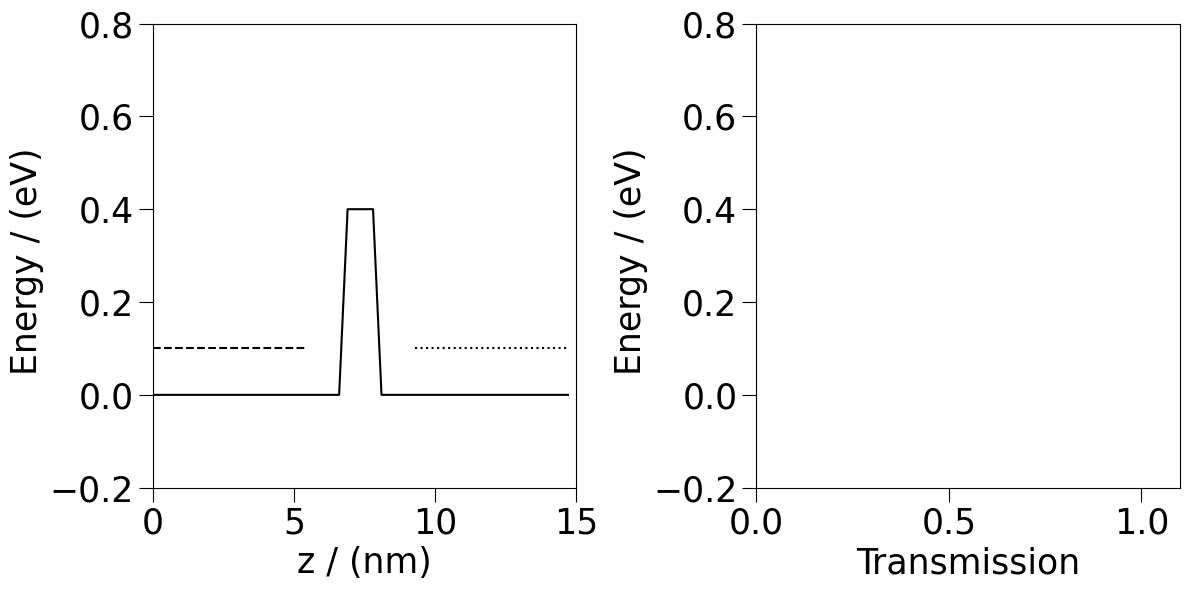

In [128]:
XX=a*1e9*np.arange(Np)
XS=XX[0:NS-4]
XD=XX[NS+NC+5-1:Np]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
fig.patch.set_facecolor('white')

ax[0].plot(XX, U1+UB,'k')
ax[0].plot(XS,mu1*np.ones(NS-4),'k--')
ax[0].plot(XD,mu2*np.ones(ND-4),'k:')
ax[1].plot(np.real(TM),E,'b')
ax[0].set_xlim(0,15)
ax[0].set_ylim(-0.2,0.8)
ax[1].set_xlim(0,1.1)
ax[1].set_ylim(-0.2,0.8)
ax[0].set_xlabel(r'z / (nm)', fontsize=25)
ax[0].set_ylabel(r'Energy / (eV) ', fontsize=25)
ax[1].set_xlabel(r'Transmission', fontsize=25)
ax[1].set_ylabel(r'Energy / (eV) ', fontsize=25)
fig.tight_layout()
#plt.savefig(path+'V_ForcedInOut.png', bbox_inches = "tight")#

In [ ]:
#Transmission
I=0 #Current
for k in range(1,NE):
    

In [109]:
ii=1
dE=5e-4*t0
rangeStart=-0.25*t0
rangeEnd=1.25*t0
nsteps = int((rangeEnd-rangeStart)/dE)
print(nsteps)
E=np.zeros(nsteps)
Tcoh=np.zeros(nsteps)

3000


In [112]:
zplus = 1j*1e-12;

for i in range(0,Np):
    EE=rangeStart+i*dE
    ck = 1-(EE-UV[1]+zplus)/(2*t0)
    ka = np.arccos(ck)
    s1 = -t0*np.exp(1j*ka)
    sig1 = np.kron(L,s1)
    ck = 1-(EE-UV[Np-1]+zplus)/(2*t0)
    ka = np.arccos(ck)
    s2 = -t0*np.exp(1j*ka)
    sig2 = np.kron(R,s2)
    gam1 = 1j*(sig1 - sig1.conj().T)
    gam2 = 1j*(sig2 - sig2.conj().T)
    G = np.linalg.inv((EE*np.eye(Np))- H - np.diag(UV) - sig1 - sig2)
    Tcoh[i] = np.real(np.trace(gam1*G*gam2*G.conj().T))
    E[i]=EE/t0

In [56]:
t0 = 1
Np = 11
N1=3
N2=9
UB1=2*t0
UB2=2*t0

In [87]:
L = np.diag(np.concatenate((1, np.zeros(Np-1)),axis=None))
R = np.diag(np.concatenate((np.zeros(Np-1), 1),axis=None))
#print(R.type)
H0 = 2*t0*np.diag(np.ones(Np)) - t0*np.diag(np.ones(Np-1),1) - t0*np.diag(np.ones(Np-1),-1)
print(H0)


[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


In [88]:
H0[N1][N1] += UB1
H0[N2][N2] += UB2
H=H0
print(H)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


In [108]:
VV=0
UV=np.linspace(0, -VV, Np) #linear potential
print(UV)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [105]:
m=np.diag([1,2])+np.diag([3],-1)
n = np.ones(2)
print(m)
print(n)
q=np.kron(m,n)
print(q)

[[1 0]
 [3 2]]
[1. 1.]
[[1. 1. 0. 0.]
 [3. 3. 2. 2.]]


In [3]:
path = 'Test1_HS_InPEC/3x/reducedfiles/'
dataSize=24001
Lx = 3.e-3
Ly = 36.e-3
Lz = 3.e-3
nCells_x=60
nCells_y=720
nCells_z=60
dt=8.66624940695912e-14
freqForced=10e9
numYLocs_ESurf= 21
numYLocs_BSurf= numYLocs_ESurf
numEVol=1
numBVol=1
TimeStart=6
cycles=6

path = 'Test1_HS_InPEC/Debug/reducedfiles/'
dataSize=1001
Lx = 3.e-3
Ly = 3.e-3
Lz = 3.e-3
nCells_x=30
nCells_y=30
nCells_z=30
dt=1.733249881e-13
freqForced=100e9
numYLocs_ESurf= 5
numYLocs_BSurf= numYLocs_ESurf
numEVol=3
numBVol=1
TimeStart=6
cycles=6

path = 'Test1_HS_InPEC/6x/reducedfiles/'
dataSize=18001
Lx = 3.e-3
Ly = 72.e-3
Lz = 3.e-3
nCells_x=60
nCells_y=1440
nCells_z=60
dt=8.66624940695912e-14
freqForced=10e9
numYLocs_ESurf= 41
numYLocs_BSurf= numYLocs_ESurf
numEVol=1
numBVol=1
TimeStart=8
cycles=6

In [4]:
Ez0=1
Bx0=(Ez0/50.)
c_light=299792458

dx=Lx/nCells_x
dy=Ly/nCells_y
dz=Lz/nCells_z
print(dx,dy,dz)
t_strip=5e-5
hPort=5e-4
W_by_d=0.975184382
tan_delta=0.0001 #Loss tangent
wPort=W_by_d*hPort
mu_0=1.25663706212e-06
eps_0=8.8541878128e-12
eps_r_di=9.8 #alumina
mu_r_di=1.0 
mu_r_air=1.00000037
eps_r_air=1.0006
mili=1e-3
micro=1e-6
c_di=1./np.sqrt((eps_0*eps_r_di*mu_0*mu_r_di))
print('factor by which c_light slows down in dielectric',c_light/c_di)
eps_e = (eps_r_di+ 1.)/2.  + ((eps_r_di - 1.)/2.) * (1./np.sqrt(1.+12./W_by_d))
print('eps_e: ', eps_e)

v_p = c_light/np.sqrt(eps_e)
print('v_p (m/s): ', v_p)
print('c_di (m/s): ', c_di)
timeToReach1=(6*dy)*freqForced/v_p
timeToReach2=(Ly/2.)*freqForced/v_p
timeToReach3=(Ly-2*dy)*freqForced/v_p
timeToReflect=(2*Ly-2*dy)*freqForced/v_p
print(timeToReach2,timeToReach3,timeToReflect)

print(np.sqrt(mu_0/(eps_e*eps_0)))

alpha_theory_simple=1.322 #aluminum
alpha_theory=0.5201547 #aluminum, correction factor

#alpha_theory_simple=1.055674 #copper
#alpha_theory=0.415337 #copper, correction factor

Min_Percent_CutOff_For_Fit = 24 #%


5e-05 4.9999999999999996e-05 5e-05
factor by which c_light slows down in dielectric 3.1304951684996376
eps_e:  6.606255415397269
v_p (m/s):  116638794.54737246
c_di (m/s):  95765187.88996646
3.086451650988104 6.164329825167907 12.337233127144115
146.5726321092316


In [5]:
print(Ly/wPort)

147.66438291871657


In [6]:
ESurf_Files = []

#Define E-surfaces

numPerY_ESurf=1
numSurfs_ESurf = numYLocs_ESurf*numPerY_ESurf
eSurfName=np.empty(numSurfs_ESurf, dtype=object)
for l in range(0, numYLocs_ESurf):
    for s in range(0, numPerY_ESurf):
        p=l*numPerY_ESurf+s
        eSurfName[p] = 'ESurf_L'+ str(l+1)+'S'+str(s+1)+'.txt'
#        print(bSurfName[l*numPerY_BSurf+s])

for l in range(0, numYLocs_ESurf):
    for s in range(0, numPerY_ESurf):
        p=l*numPerY_ESurf+s
        ESurf_Files.append(path+eSurfName[p])
print(ESurf_Files)
num_ESurf_Files=len(ESurf_Files)
print(num_ESurf_Files)

step = np.zeros(dataSize,dtype=float)
time =  np.zeros(dataSize,dtype=float)
print(time)
Vx =  np.zeros((num_ESurf_Files,dataSize))
Vy =  np.zeros((num_ESurf_Files,dataSize))
Vz =  np.zeros((num_ESurf_Files,dataSize))
for f in range(0,num_ESurf_Files):
    file = open(ESurf_Files[f])
    lst = []
    counter=0
    for line in file:     
        if (counter > 0):
            lst += [line.split()]
#        else:
#            print(line)
        counter = counter + 1 
    if (f==0):
        step  = [x[0] for x in lst]
        time  = [x[1] for x in lst]
    Vx[f]  = [x[2] for x in lst]
    Vy[f]  = [x[3] for x in lst]
    Vz[f]  = [x[4] for x in lst]

['Test1_HS_InPEC/6x/reducedfiles/ESurf_L1S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L2S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L3S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L4S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L5S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L6S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L7S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L8S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L9S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L10S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L11S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L12S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L13S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L14S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L15S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L16S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L17S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L18S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L19S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/ESurf_L20S1.txt', 'Test1_H

In [7]:
step = np.asfarray(step)
time = np.asfarray(time)
print(time)

TimeEnd=TimeStart+cycles
lowerIdx=np.argwhere((time >= TimeStart/freqForced) &  (time < TimeStart/freqForced+dt))[0][0]
upperIdx=np.argwhere((time >= TimeEnd/freqForced) &  (time < TimeEnd/freqForced+dt))[0][0]
print(lowerIdx)
print(upperIdx)

[0.00000000e+00 8.66624941e-14 1.73324988e-13 ... 1.55975157e-09
 1.55983823e-09 1.55992489e-09]
9232
16155


In [8]:
EzForced=Ez0*np.sin(2*np.pi*freqForced*time)
BxForced=Bx0*np.sin(2*np.pi*freqForced*time)
print(-Bx0*wPort)

-9.75184382e-06


In [9]:
BSurf_Files = []

#Define B-surfaces
numPerY_BSurf=4
numSurfs_BSurf =  numYLocs_BSurf*numPerY_BSurf
bSurfName=np.empty(numSurfs_BSurf, dtype=object)
for l in range(0, numYLocs_BSurf):
    for s in range(0, numPerY_BSurf):
        p=l*numPerY_BSurf+s
        bSurfName[p] = 'BSurf_L'+ str(l+1)+'S'+str(s+1)+'.txt'
#        print(bSurfName[l*numPerY_BSurf+s])

for l in range(0, numYLocs_BSurf):
    for s in range(0, numPerY_BSurf):
        p=l*numPerY_BSurf+s
        BSurf_Files.append(path+bSurfName[p])
        
print(BSurf_Files)
num_BSurf_Files=len(BSurf_Files)
print(num_BSurf_Files)

Bx =  np.zeros((num_BSurf_Files,dataSize))
By =  np.zeros((num_BSurf_Files,dataSize))
Bz =  np.zeros((num_BSurf_Files,dataSize))
for f in range(0,num_BSurf_Files):
    file = open(BSurf_Files[f])
    lst = []
    counter=0
    for line in file:     
        if (counter > 0):
            lst += [line.split()]
#        else:
#            print(line)
        counter = counter + 1 
    Bx[f]  = [x[2] for x in lst]
    By[f]  = [x[3] for x in lst]
    Bz[f]  = [x[4] for x in lst]
Bx=np.asfarray(Bx)
By=np.asfarray(By)
Bz=np.asfarray(Bz)

['Test1_HS_InPEC/6x/reducedfiles/BSurf_L1S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L1S2.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L1S3.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L1S4.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L2S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L2S2.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L2S3.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L2S4.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L3S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L3S2.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L3S3.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L3S4.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L4S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L4S2.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L4S3.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L4S4.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L5S1.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L5S2.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L5S3.txt', 'Test1_HS_InPEC/6x/reducedfiles/BSurf_L5S4.txt', 'Test1_HS_InPEC/6x/

In [10]:
#Define E-volumes
EVol_Files = []

eVolName = np.empty(numEVol,dtype=object)
for v in range(0, numEVol):
    eVolName[v] = 'EVolume' + str(v+1)+'.txt'
print(eVolName)

for v in range(0, numEVol):
    EVol_Files.append(path+eVolName[v])
        
num_EVol_Files=len(EVol_Files)
print(num_EVol_Files)

Evol =  np.zeros((num_EVol_Files,dataSize))

for f in range(0,num_EVol_Files):
    file = open(EVol_Files[f])
    lst = []
    counter=0
    for line in file:     
        if (counter > 0):
            lst += [line.split()]
        else:
            print(line)
        counter = counter + 1 
    Evol[f]  = [x[2] for x in lst]

['EVolume1.txt']
1
#[0]step() [1]time(s) [2]integral of if(z < sub_thick, 0.5*(Ex**2 + Ey**2 + Ez**2)*eps_0*eps_r_alumina, 0.5*(Ex**2 + Ey**2 + Ez**2)*eps_0*eps_r_air) (SI units)



In [11]:
#Define B-volumes
BVol_Files = []

bVolName = np.empty(numBVol,dtype=object)
for v in range(0, numBVol):
    bVolName[v] = 'BVolume' + str(v+1)+'.txt'
print(bVolName)

for v in range(0, numBVol):
    BVol_Files.append(path+bVolName[v])
        
num_BVol_Files=len(BVol_Files)
print(num_BVol_Files)

Bvol =  np.zeros((num_BVol_Files,dataSize))

for f in range(0,num_BVol_Files):
    file = open(BVol_Files[f])
    lst = []
    counter=0
    for line in file:     
        if (counter > 0):
            lst += [line.split()]
        else:
            print(line)
        counter = counter + 1 
    Bvol[f]  = [x[2] for x in lst]

['BVolume1.txt']
1
#[0]step() [1]time(s) [2]integral of 0.5*(Bx**2+By**2+Bz**2)/mu_0 (SI units)



# Compute Voltage

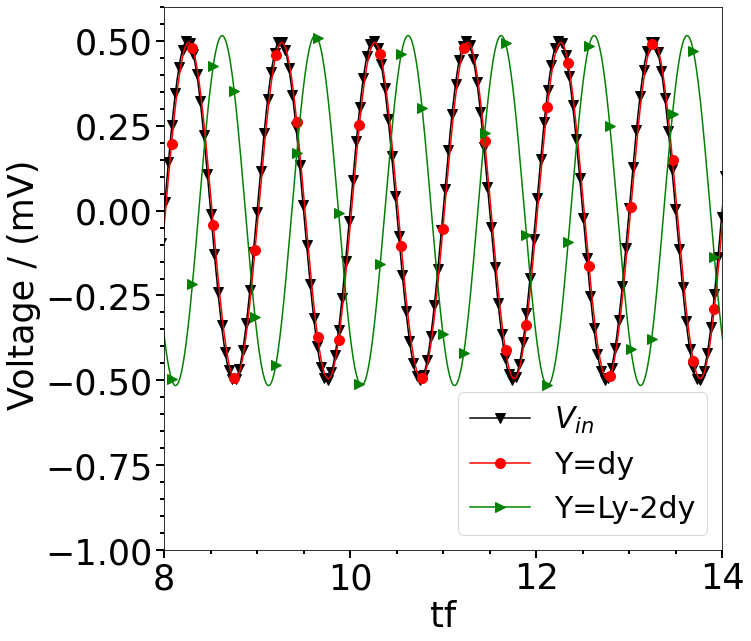

In [12]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
ax1.plot(time*freqForced, EzForced*hPort/mili, 'k', marker='v',markevery=44,markersize=10,label=r'$V_{in}$')
ax1.plot(time*freqForced, Vz[0]/mili, 'r',markevery=259,marker='o',markersize=10,label=r'Y=dy')
#ax1.plot(time*freqForced, Vz[1]/mili, 'b',label=r'0.5Ly')
ax1.plot(time*freqForced, Vz[2]/mili, 'g',markevery=259,marker='>',markersize=10,label=r'Y=Ly-2dy')

ax1.legend(prop={'size': 20},loc='best')
ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.legend(prop={'size': 30},loc='lower right')

ax1.set_xlim(TimeStart,TimeEnd)
#ax1.set_xlim(0,TimeEnd)
ax1.set_ylim(-1,0.6)

ax1.set_xlabel(r'tf', fontsize=35)
ax1.set_ylabel(r'Voltage / (mV) ', fontsize=35)
plt.savefig(path+'V_ForcedInOut.png', bbox_inches = "tight")#

# Compute $V_0$

In [13]:
Idx=np.zeros(cycles+1, dtype=int)
for c in range(0,cycles+1):
    t1 = TimeStart+(c)*1
    Idx[c]=np.argwhere((time >= t1/freqForced) &  (time < t1/freqForced+dt))[0][0]
#    print(c, t1, Idx[c])

V_Amplitude=np.zeros(numYLocs_ESurf)
for p in range(0,numYLocs_ESurf):
    Vz_max = 0.0
    Vz_min = 0.0
    for c in range(0,cycles):
        Vz_max += np.max(Vz[p][Idx[c]:Idx[c+1]]) 
        Vz_min += np.min(Vz[p][Idx[c]:Idx[c+1]]) 
    Vz_max = Vz_max/(cycles)
    Vz_min = Vz_min/(cycles)

    V_Amplitude[p] = (Vz_max - Vz_min)/2.
#    print('Max Voltage amplitude from Artemis at location %d, %s' %(p , V_Amplitude[p]))

distance=np.zeros(numYLocs_BSurf)
distance[0]=dy
distance[numYLocs_BSurf-1]=Ly-2*dy
remainingLocs=numYLocs_BSurf-2
percent_step = 100./(remainingLocs+1)
for l in range(1, numYLocs_BSurf-1):
    distance[l]= percent_step*(l)/100*Ly
print(distance*100/Ly)

[6.94444444e-02 2.50000000e+00 5.00000000e+00 7.50000000e+00
 1.00000000e+01 1.25000000e+01 1.50000000e+01 1.75000000e+01
 2.00000000e+01 2.25000000e+01 2.50000000e+01 2.75000000e+01
 3.00000000e+01 3.25000000e+01 3.50000000e+01 3.75000000e+01
 4.00000000e+01 4.25000000e+01 4.50000000e+01 4.75000000e+01
 5.00000000e+01 5.25000000e+01 5.50000000e+01 5.75000000e+01
 6.00000000e+01 6.25000000e+01 6.50000000e+01 6.75000000e+01
 7.00000000e+01 7.25000000e+01 7.50000000e+01 7.75000000e+01
 8.00000000e+01 8.25000000e+01 8.50000000e+01 8.75000000e+01
 9.00000000e+01 9.25000000e+01 9.50000000e+01 9.75000000e+01
 9.98611111e+01]


In [14]:
print(percent_step)

2.5


at y=0, Amplitude_theory_simple: 0.0005257586908439227
at y=0, Amplitude_theory: 0.0004963045089836005
FitIDStart, FitIDEnd 10 40
[0.018  0.0198 0.0216 0.0234 0.0252 0.027  0.0288 0.0306 0.0324 0.0342
 0.036  0.0378 0.0396 0.0414 0.0432 0.045  0.0468 0.0486 0.0504 0.0522
 0.054  0.0558 0.0576 0.0594 0.0612 0.063  0.0648 0.0666 0.0684 0.0702]
[0.00051756 0.00051718 0.00051658 0.00051586 0.00051503 0.00051398
 0.00051286 0.00051161 0.00051024 0.00050883 0.00050744 0.00050588
 0.00050429 0.00050263 0.00050094 0.00049933 0.00049787 0.0004962
 0.00049462 0.00049296 0.00049145 0.00049    0.00048883 0.00048733
 0.00048592 0.00048438 0.00048307 0.0004816  0.00048074 0.00047919]
1.5842650523914503 0.0005358161908159763
Vin 0.0005358161908159763
Vout 0.00047805418839219415


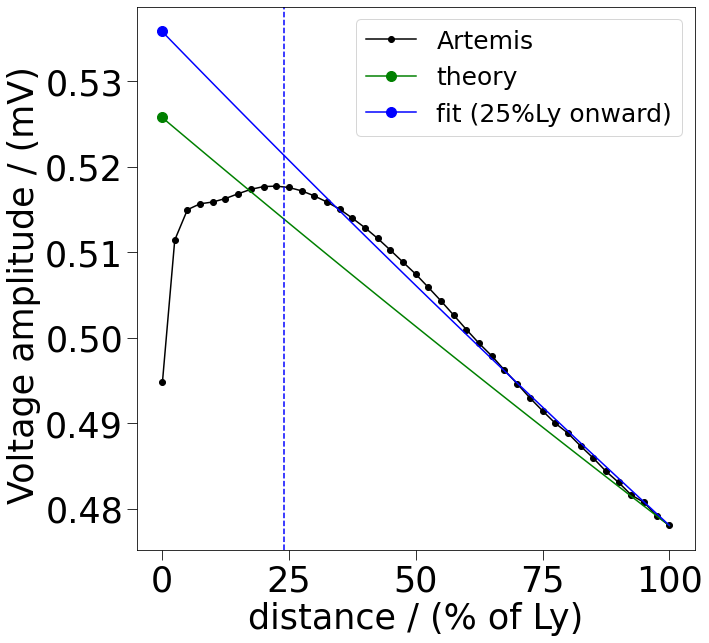

In [15]:
y_dist=np.linspace(0,Ly,100)

RefID=numYLocs_ESurf-1
V_Amplitude_theory_simple=V_Amplitude[RefID]*np.exp(-alpha_theory_simple*(y_dist-distance[RefID]))
V_Amplitude_theory_simple_atY0= V_Amplitude[RefID]*np.exp(-alpha_theory_simple*(0-distance[RefID]))
print('at y=0, Amplitude_theory_simple:',V_Amplitude_theory_simple_atY0)

V_Amplitude_theory=V_Amplitude[RefID]*np.exp(-alpha_theory*(y_dist-distance[RefID]))
V_Amplitude_theory_atY0= V_Amplitude[RefID]*np.exp(-alpha_theory*(0-distance[RefID]))
print('at y=0, Amplitude_theory:',V_Amplitude_theory_atY0)

#plane1=np.argwhere((distance*100/Ly >= 15) &  (distance*100/Ly < 15 + percent_step))[0][0]
#plane2=numYLocs_ESurf-1
#V1=(np.max(Vz[plane1][lowerIdx:upperIdx]) - np.min(Vz[plane1][lowerIdx:upperIdx]))/2.
#Y1=distance[plane1]*Ly/100
#V2=(np.max(Vz[plane2][lowerIdx:upperIdx]) - np.min(Vz[plane2][lowerIdx:upperIdx]))/2.
#Y2=distance[plane2]*Ly/100

#alpha_c_2pt=np.log(V2/V1)/(Y2-Y1)
#print('alpha_c_2pt',alpha_c_2pt)
#Amplitude_2pt = V2*np.exp(alpha_c_2pt*(y_dist-Y2))
#Amplitude_2pt_atY0 = V2*np.exp(alpha_c_2pt*(0-Y2))
#print('at y=0, Amplitude_2pt:',Amplitude_2pt_atY0)

from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return -A*x + B

FitIDStart=np.argwhere((distance*100/Ly >= Min_Percent_CutOff_For_Fit) &  (distance*100/Ly <= Min_Percent_CutOff_For_Fit + percent_step))[0][0]
FitIDEnd=numYLocs_ESurf-1
print('FitIDStart, FitIDEnd', FitIDStart, FitIDEnd)
print(distance[FitIDStart:FitIDEnd])
print(V_Amplitude[FitIDStart:FitIDEnd])
popt_V, pcov_V = curve_fit(f, xdata=distance[FitIDStart:FitIDEnd+1], ydata=np.log(V_Amplitude[FitIDStart:FitIDEnd+1])) # your data x, y to fit
print(popt_V[0],np.exp(popt_V[1]))
alpha_c_fit=popt_V[0]
V_Amplitude_fit_atY0=np.exp(popt_V[1])
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
ax1.plot(distance*100/Ly,V_Amplitude/mili, 'k', marker='o',markevery=1,label=r'Artemis')
ax1.plot(y_dist*100/Ly, V_Amplitude_theory_simple/mili, 'g',marker='o',markevery=1e6,markersize=10, label=r'theory')
ax1.plot(y_dist*100/Ly, (np.exp(popt_V[1]-popt_V[0]*y_dist))/mili, 'b', marker='o',markevery=1e6,markersize=10,label=r'fit (25%Ly onward)')
#ax1.set_yscale('log')
plt.axvline(x=Min_Percent_CutOff_For_Fit, color='b', linestyle='--')

ax1.legend(prop={'size': 25},loc='upper right')
#ax1.plot(y_dist*100/Ly, V_Amplitude_theory/mili, 'r', label=r'V Amplitude (theory corrected)')
#ax1.legend(prop={'size': 25},loc='upper right')
ax1.set_xlabel(r'distance / (% of Ly)', fontsize=35)
ax1.set_ylabel(r'Voltage amplitude / (mV) ', fontsize=35)
plt.savefig(path+'V_amplitude.png', bbox_inches = "tight")#

Vin= V_Amplitude_fit_atY0
Vout= (np.exp(popt_V[1]-popt_V[0]*Ly))
print('Vin',Vin)
print('Vout',Vout)

# Compute $W_e$

We 9.260857634228678e-19
2.0887297916457582e-10 1.217918245857585
C, C/C_theory 1.792037269724344e-10 1.0449196908013667


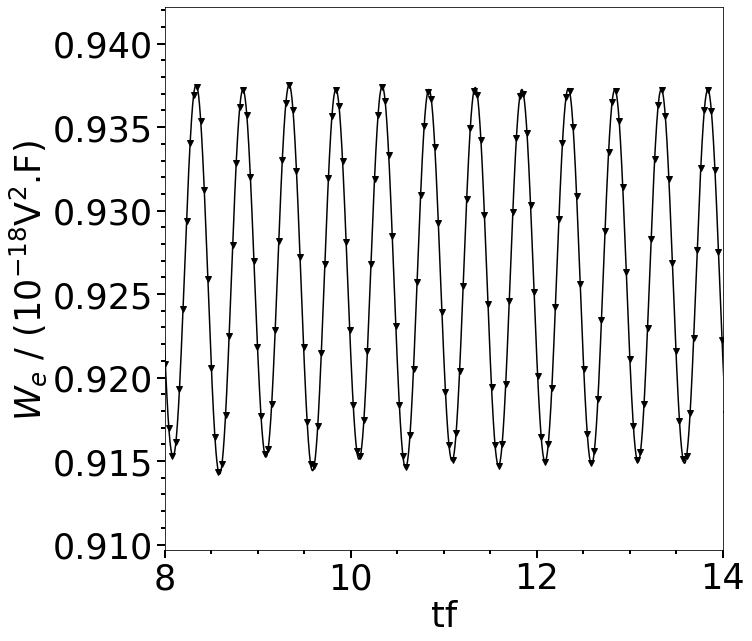

In [16]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')

ax1.plot(time*freqForced, Evol[0]/1e-18, 'k', marker='v',markevery=44,label=r'$\epsilon \bar{E}\cdot \bar{E}/4$')
#ax1.plot(time*freqForced, Evol[1]/1e-18, 'r', marker='v',markevery=24,label=r'$\epsilon \bar{E}\cdot \bar{E}/4$')

ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

#ax1.set_xlim(10,16)
#print(np.max(Evol[0]))

ax1.set_xlabel(r'tf', fontsize=35)
ax1.set_ylabel(r'$W_e$ / (10$^{-18}$V$^2$.F) ', fontsize=35)

We = Evol[0][lowerIdx:upperIdx+1]
We_Avg=np.average(We)
print('We', We_Avg)
plt.savefig(path+'We_full.png', bbox_inches = "tight")#
ax1.set_xlim(TimeStart,TimeEnd)
ax1.set_ylim(0.995*np.min(We/1e-18),1.005*np.max(We/1e-18))
plt.savefig(path+'We.png', bbox_inches = "tight")#

C_theory_lossless = 1.715e-10
C_theory_extrapolate=We_Avg*4/Ly/(V_Amplitude_theory_atY0)**2
C_fit_extrapolate=We_Avg*4/Ly/(V_Amplitude_fit_atY0)**2

print(C_theory_extrapolate,C_theory_extrapolate/C_theory_lossless)
print('C, C/C_theory',C_fit_extrapolate,C_fit_extrapolate/C_theory_lossless)

In [17]:
if (numEVol > 1):
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')

    ax1.plot(time*freqForced, Evol[2]/1e-18, 'r', marker='v',markevery=24,label=r'$\epsilon \bar{E}\cdot \bar{E}/4$')

    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    ax1.set_xlabel(r'tf', fontsize=35)
    ax1.set_ylabel(r'$W_e$ / (10$^{-18}$V$^2$.F) ', fontsize=35)

    We = Evol[2][lowerIdx:upperIdx+1]
    We_Avg=np.average(We)
    print('We', We_Avg)
    plt.savefig(path+'We_full_25pLyOnward.png', bbox_inches = "tight")#
    ax1.set_xlim(4,17)
    ax1.set_ylim(0.995*np.min(We/1e-18),1.005*np.max(We/1e-18))
    plt.savefig(path+'We_25pLyOnward.png', bbox_inches = "tight")#

    C_theory_lossless = 1.715e-10
    C_theory_extrapolate=We_Avg*4/Ly/(V_Amplitude_theory_atY0)**2
    C_fit_extrapolate=We_Avg*4/Ly/(V_Amplitude_fit_atY0)**2

    print(C_theory_extrapolate,C_theory_extrapolate/C_theory_lossless)
    print('C, C/C_theory',C_fit_extrapolate,C_fit_extrapolate/C_theory_lossless)

# Compute Shunt Inductance

In [18]:
G = 2*np.pi*freqForced*(tan_delta)*C_fit_extrapolate
print("Shunt conductance, G [S/m]", G)

Shunt conductance, G [S/m] 0.001125970224305022


# Compute Current

In [19]:
I = np.zeros((numYLocs_BSurf,dataSize))
I0 = np.zeros((numYLocs_BSurf,dataSize))
I1 = np.zeros((numYLocs_BSurf,dataSize))
I2 = np.zeros((numYLocs_BSurf,dataSize))
I3 = np.zeros((numYLocs_BSurf,dataSize))
for l in range(0, numYLocs_BSurf):
    I[l] = Bx[l*numPerY_BSurf+0]/dz + Bx[l*numPerY_BSurf+2]/dz + Bz[l*numPerY_BSurf+1]/dx + Bz[l*numPerY_BSurf+3]/dx
    I0[l] = Bx[l*numPerY_BSurf+0]/dz 
    I2[l] = Bx[l*numPerY_BSurf+2]/dz 
    I1[l] = Bz[l*numPerY_BSurf+1]/dx
    I3[l] = Bz[l*numPerY_BSurf+3]/dx
    # Bz[l*numPerY_BSurf+1]/dx - Bz[l*numPerY_BSurf+3]/dx
    if(l==0):
        print(Bx[l*numPerY_BSurf+0]/dz)
        print(Bx[l*numPerY_BSurf+2]/dz)
        print(Bz[l*numPerY_BSurf+1]/dx)
        print(Bz[l*numPerY_BSurf+3]/dx)

[-0.00000000e+00 -0.00000000e+00 -5.00209866e-08 ...  4.88947661e-06
  4.93830957e-06  4.98699549e-06]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.21770370e-06
 -1.21474175e-06 -1.21174303e-06]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.80782205e-07
 -2.79131937e-07 -2.77473114e-07]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -2.80782205e-07
 -2.79131937e-07 -2.77473114e-07]


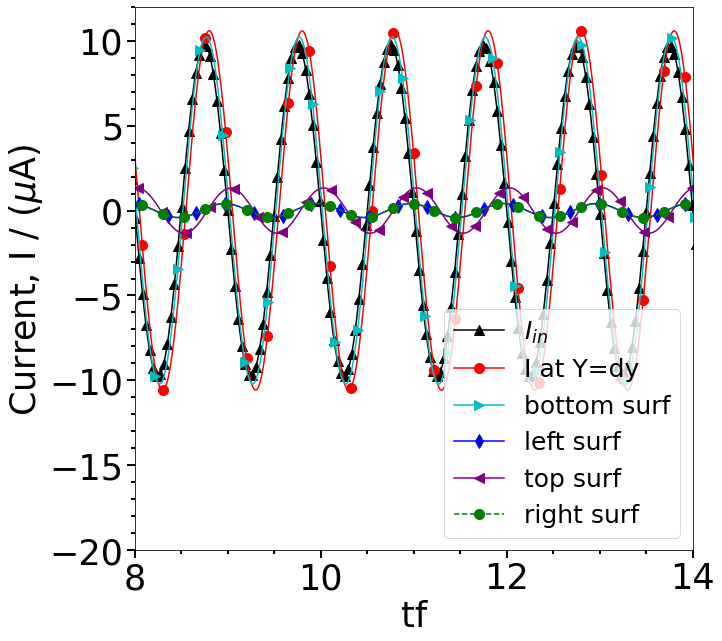

In [20]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')


ax1.plot(time*freqForced, -BxForced*wPort/micro, 'k', marker='^',markevery=44,markersize=10,label=r'$I_{in}$')
ax1.plot(time*freqForced, I[0]/micro, 'r',markevery=259,marker='o',markersize=10,label=r'I at Y=dy')
ax1.plot(time*freqForced, I0[0]/micro, 'c',markevery=279,marker='>',markersize=10,label=r'bottom surf')
ax1.plot(time*freqForced, I1[0]/micro, 'b',markevery=357,marker='d',markersize=10,label=r'left surf')
ax1.plot(time*freqForced, I2[0]/micro, 'purple',markevery=299,marker='<',markersize=10,label=r'top surf')
ax1.plot(time*freqForced, I3[0]/micro, 'g--',markevery=259,marker='o',markersize=10,label=r'right surf')

ax1.legend(prop={'size': 20},loc='best')
ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.legend(prop={'size': 25},loc='lower right')

ax1.set_xlim(TimeStart,TimeEnd)
#ax1.set_xlim(-0.1,12)
#ax1.set_xlim(2,4)
ax1.set_ylim(-20,12)

ax1.set_xlabel(r'tf', fontsize=35)
ax1.set_ylabel(r'Current, I / ($\mu$A) ', fontsize=35)
plt.savefig(path+'I_ForcedInAndFourSurfaces.png', bbox_inches = "tight")#

20


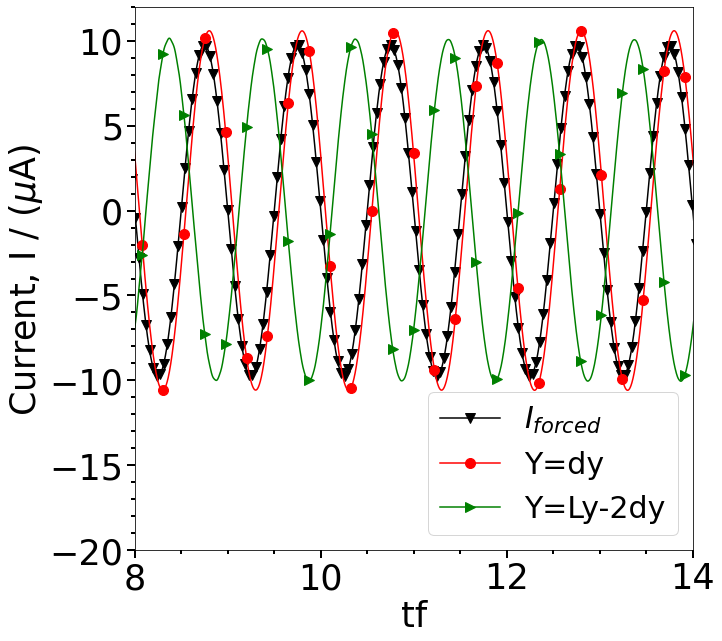

In [21]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')


ax1.plot(time*freqForced, -BxForced*wPort/micro, 'k', marker='v',markevery=44,markersize=10,label=r'$I_{forced}$')
ax1.plot(time*freqForced, I[0]/micro, 'r',markevery=259,marker='o',markersize=10,label=r'Y=dy')
print(int(numYLocs_BSurf/2))
#ax1.plot(time*freqForced, I[int(numYLocs_BSurf/2)]/micro, 'b',label=r'0.5Ly')
ax1.plot(time*freqForced, I[numYLocs_BSurf-1]/micro, 'g',markevery=259,marker='>',markersize=10,label=r'Y=Ly-2dy')

ax1.legend(prop={'size': 20},loc='best')
ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.legend(prop={'size': 30},loc='lower right')

ax1.set_xlim(TimeStart,TimeEnd)
#ax1.set_xlim(-0.1,12)
#ax1.set_xlim(2,4)
ax1.set_ylim(-20,12)

ax1.set_xlabel(r'tf', fontsize=35)
ax1.set_ylabel(r'Current, I / ($\mu$A) ', fontsize=35)
plt.savefig(path+'I_ForcedInOut.png', bbox_inches = "tight")#

# Compute $I_0$

In [22]:
I_Amplitude=np.zeros(numYLocs_BSurf)
for p in range(0,numYLocs_BSurf):
    I_max = 0.0
    I_min = 0.0
    for c in range(0,cycles):
        I_max += np.max(I[p][Idx[c]:Idx[c+1]]) 
        I_min += np.min(I[p][Idx[c]:Idx[c+1]]) 
    I_max = I_max/(cycles)
    I_min = I_min/(cycles)

    I_Amplitude[p] = (I_max - I_min)/2.
    print('Max Current amplitude from Artemis at location %d, %s' %(p , I_Amplitude[p]))
    
VIRatio=np.zeros(numYLocs_BSurf)
for p in range(0,numYLocs_BSurf):
    VIRatio[p]=V_Amplitude[p]/I_Amplitude[p]
    print('V/I %d, %s', p, VIRatio[p])

Max Current amplitude from Artemis at location 0, 1.0578983420853289e-05
Max Current amplitude from Artemis at location 1, 1.084577341580348e-05
Max Current amplitude from Artemis at location 2, 1.0880487889009288e-05
Max Current amplitude from Artemis at location 3, 1.087698264147823e-05
Max Current amplitude from Artemis at location 4, 1.0871757301087045e-05
Max Current amplitude from Artemis at location 5, 1.0873700513211632e-05
Max Current amplitude from Artemis at location 6, 1.088145433449197e-05
Max Current amplitude from Artemis at location 7, 1.088944094181321e-05
Max Current amplitude from Artemis at location 8, 1.0894907285234093e-05
Max Current amplitude from Artemis at location 9, 1.0896120797607308e-05
Max Current amplitude from Artemis at location 10, 1.0891672847273618e-05
Max Current amplitude from Artemis at location 11, 1.0882087413306298e-05
Max Current amplitude from Artemis at location 12, 1.0870541798662744e-05
Max Current amplitude from Artemis at location 13, 1

1.5990663619168544 1.1280505456869358e-05
Iin 1.1280505456869358e-05
Iout 1.005372564761474e-05


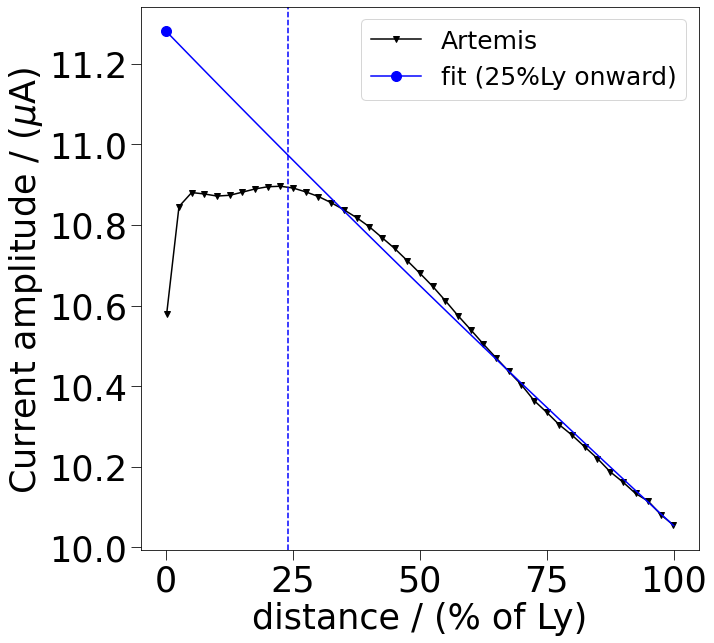

In [23]:
y_dist=np.linspace(0,Ly,100)

#RefID=numYLocs_ESurf-1
#I_Amplitude_theory_simple=I_Amplitude[RefID]*np.exp(-alpha_theory_simple*(y_dist-distance[RefID]))
#I_Amplitude_theory_simple_atY0= V_Amplitude[RefID]*np.exp(-alpha_theory_simple*(0-distance[RefID]))
#print('at y=0, Amplitude_theory_simple:',V_Amplitude_theory_simple_atY0)

#V_Amplitude_theory=V_Amplitude[RefID]*np.exp(-alpha_theory*(y_dist-distance[RefID]))
#V_Amplitude_theory_atY0= V_Amplitude[RefID]*np.exp(-alpha_theory*(0-distance[RefID]))
#print('at y=0, Amplitude_theory:',V_Amplitude_theory_atY0)

popt_I, pcov_I = curve_fit(f, xdata=distance[FitIDStart:FitIDEnd+1], ydata=np.log(I_Amplitude[FitIDStart:FitIDEnd+1])) # your data x, y to fit
print(popt_I[0],np.exp(popt_I[1]))
alpha_c_fit=popt_I[0]
I_Amplitude_fit_atY0=np.exp(popt_I[1])

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
ax1.plot(distance*100/Ly,I_Amplitude/micro, 'k', marker='v',markevery=1,label=r'Artemis')
ax1.plot(y_dist*100/Ly, (np.exp(popt_I[1]-popt_I[0]*y_dist))/micro, 'b',marker='o',markevery=1e6,markersize=10, label=r'fit (25%Ly onward)')
#ax1.set_ylim(1.35,1.6)
plt.axvline(x=Min_Percent_CutOff_For_Fit, color='b', linestyle='--')

#ax1.set_yscale('log')
#ax1.plot(y_dist*100/Ly, V_Amplitude_theory_simple/mili, 'g', label=r'Amplitude (theory simple)')
#ax1.legend(prop={'size': 25},loc='upper right')
#ax1.plot(y_dist*100/Ly, V_Amplitude_theory/mili, 'r', label=r'Amplitude (theory corrected)')
ax1.legend(prop={'size': 25},loc='upper right')
ax1.set_xlabel(r'distance / (% of Ly)', fontsize=35)
ax1.set_ylabel(r'Current amplitude / ($\mu$A) ', fontsize=35)
plt.savefig(path+'I_amplitude.png', bbox_inches = "tight")#

Iin= I_Amplitude_fit_atY0
Iout= (np.exp(popt_I[1]-popt_I[0]*Ly))
print('Iin',Iin)
print('Iout',Iout)

# Compute $W_m$

Wm 9.169471055934704e-19
I_Amplitude_fit_atY0 1.1280505456869358e-05
L, L/L_theory 4.0032679438569905e-07 0.9338723467849672


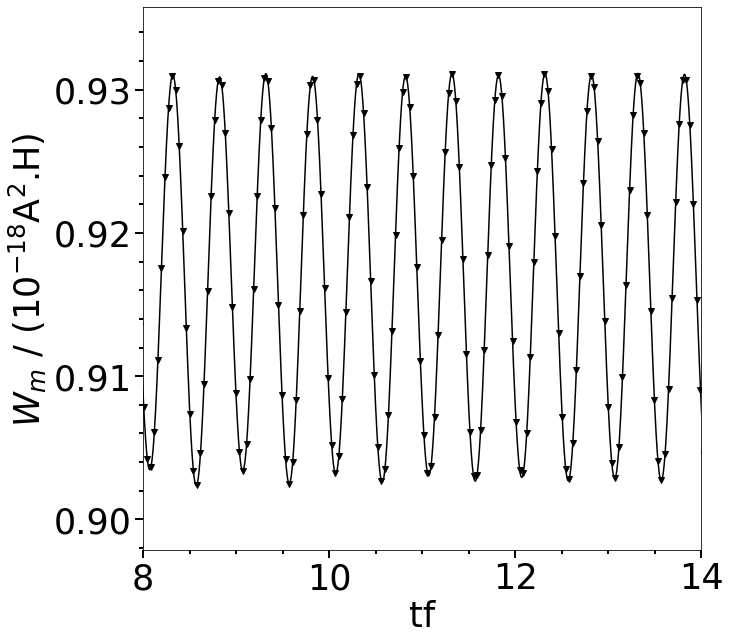

In [24]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')

ax1.plot(time*freqForced, Bvol[0]/1e-18, 'k', marker='v',markevery=44,label=r'$W_m$')

ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

#ax1.set_xlim(10,16)
#print(np.max(Evol[0]))

ax1.set_xlabel(r'tf', fontsize=35)
ax1.set_ylabel(r'$W_m$ / (10$^{-18}$A$^2$.H) ', fontsize=35)

Wm = Bvol[0][lowerIdx:upperIdx+1]
Wm_Avg=np.average(Wm)
print('Wm', Wm_Avg)
print('I_Amplitude_fit_atY0',I_Amplitude_fit_atY0)
L_theory_lossless = 4.28674e-07
#L_theory_extrapolate=We_Avg*4/Ly/(V_Amplitude_theory_atY0)**2
L_fit_extrapolate=Wm_Avg*4/Ly/(I_Amplitude_fit_atY0)**2

ax1.set_xlim(TimeStart,TimeEnd)
ax1.set_ylim(0.995*np.min(Wm/1e-18),1.005*np.max(Wm/1e-18))
plt.savefig(path+'Wm.png', bbox_inches = "tight")#

#print(C_theory_extrapolate,C_theory_extrapolate/C_theory_lossless)
print('L, L/L_theory', L_fit_extrapolate,L_fit_extrapolate/L_theory_lossless)

In [25]:
with open(path+'data.dat', 'w') as f:
    print('###########Voltage, Total stored electric energy, and Capacitance################', file=f)
    print('W_e (V^2.F):', We_Avg, file=f)
    print('alpha_c_theory (Rs/(Z0 W)): ',alpha_theory, file=f)
    print('amplitude (theory-extrapolated) at y=0: ', V_Amplitude_theory_atY0, file=f)
    print('C_theory_lossless (per unit length):', C_theory_lossless, file=f)
    print('alpha_c_fit: ',alpha_c_fit, file=f)
    print('V_Amplitude_fit_atY0: ',V_Amplitude_fit_atY0, file=f)
    print('C_theory_extrapolate, C_theory_extrapolate/C_theory_lossless, %: ', C_theory_extrapolate, C_theory_extrapolate/C_theory_lossless, (C_theory_extrapolate-C_theory_lossless)*100/C_theory_lossless, file=f)
    print('C_fit, C_fit/C_theory, (C_fit-C_theory)*100/C_theory: ', C_fit_extrapolate, C_fit_extrapolate/C_theory_lossless, (C_fit_extrapolate-C_theory_lossless)*100/C_theory_lossless, file=f)
    print('###########Shunt conductance################', file=f)
    print("Shunt conductance, G [S/m]", G, file=f)
    print('###########Current, Total stored magnetic energy, and Inductance################', file=f)
    print('I_Amplitude_fit_atY0',I_Amplitude_fit_atY0, file=f)
    print('W_m', Wm_Avg, file=f)
    print('L, L/L_theory, (L-L_theory)100/L_theory', L_fit_extrapolate,L_fit_extrapolate/L_theory_lossless, (L_fit_extrapolate-L_theory_lossless)*100/L_theory_lossless, file=f)

# Compute Z0

In [26]:
L=L_fit_extrapolate
C=C_fit_extrapolate
print("L",L)
print("C",C)
print("G",G)
f_sample=freqForced
#f_sample=10e9
G_sample = 2*np.pi*f_sample*(tan_delta)*C_fit_extrapolate
print("G_sample",G_sample)
omega=2*np.pi*f_sample
print("omega",omega)
Denom = G_sample**2+(omega*C)**2
print("Denom",Denom)
a=omega**2*L*C/Denom
b=G_sample*omega*L/Denom
print("a",a)
print("b",b)
print("sqrt(a)",np.sqrt(a))
c=np.sqrt(a**2 + b**2)
A = np.sqrt((c+a)/2.)
print("A", A)
sign_b=(b/np.abs(b))
print("sign_b",sign_b)
B=(sign_b)*np.sqrt((c-a)/2.)
print("B",B)
Mag=np.sqrt(A**2+B**2)
print("Magnitude of A+jB",Mag)
Z0_r = A
Z0=A+1j*B
Z0_appx=np.sqrt(L/C)
print("Z0, Z0_appx", Z0, Z0_appx)

L 4.0032679438569905e-07
C 1.792037269724344e-10
G 0.001125970224305022
G_sample 0.001125970224305022
omega 62831853071.79586
Denom 126.78089586995907
a 2233.920003483022
b 0.22339200034830226
sqrt(a) 47.26436293321874
A 47.2643629922992
sign_b 1.0
B 0.0023632181373517995
Magnitude of A+jB 47.26436305137965
Z0, Z0_appx (47.2643629922992+0.0023632181373517995j) 47.26436316954056


In [27]:
print("omega*L",omega*L)
print("omega*C/G",omega*C/G)
#For a low lossy line 
#R=47.264
#alpha_lowLoss=0.5*(R/Z0 + G*Z0)
#print("alpha_lowloss",alpha_lowLoss)
print('alpha_c_theory (Rs/(Z0 W)): ',alpha_theory)
print('alpha_c_fit (voltage): ',alpha_c_fit)
beta_lowLoss=omega*np.sqrt(L*C)
print("beta_lowloss",beta_lowLoss)

omega*L 25153.274325545273
omega*C/G 9999.999999999998
alpha_c_theory (Rs/(Z0 W)):  0.5201547
alpha_c_fit (voltage):  1.5990663619168544
beta_lowloss 532.182655996416


# Compute S-parameter from wave approach

In [29]:
#G=0
R=0
p=R*G-omega**2*L*C
q=omega*(L*G+R*C)
r=p+1j*q
r_abs=np.abs(r)
print('r, abs(r)',r,r_abs)
P=np.sqrt((r_abs+p)/2.)
sign_q=np.sign(q)
print('sign_q',sign_q)
Q=sign_q*np.sqrt((r_abs-p)/2.)
print(P,Q)
gamma=P+1j*Q
print(gamma)
X=np.exp(-gamma*Ly)
print(X)

Z0_ref=50
Gamma=(Z0-Z0_ref)/(Z0+Z0_ref)
S11=(1-X**2)*Gamma/(1-X**2*Gamma**2)
S22=S11
S12=(1-Gamma**2)*X/(1-X**2*Gamma**2)
S21=S12
print('S11',S11)
print('S12',S12)
print('S21',S21)
print('S22',S22)
print('S11**2+S21**2',np.abs(S11)**2+np.abs(S21)**2)
print('For a lossless reciprocal network np.abs(S11)=np.abs(S22)=np.sqrt(1-np.abs(S12)**2)',np.abs(S11),np.sqrt(1-np.abs(S12)**2) )

r, abs(r) (-283218.3793433996+28.321837934339968j) 283218.3807594915
sign_q 1.0
0.02660913305241196 532.1826566616443
(0.02660913305241196+532.1826566616443j)
(0.8134560881635495-0.5783293258372618j)
S11 (-0.018969817267108058-0.02643917820565224j)
S12 (0.8125917538845502-0.5786249004024161j)
S21 (0.8125917538845502-0.5786249004024161j)
S22 (-0.018969817267108058-0.02643917820565224j)
S11**2+S21**2 0.9961710179582131
For a lossless reciprocal network np.abs(S11)=np.abs(S22)=np.sqrt(1-np.abs(S12)**2) 0.0325404995557491 0.06991327594330451


In [30]:
Z11=Z0*(1./np.tanh(gamma*Ly))
Z12=Z0*(1./np.sinh(gamma*Ly))
Z22=Z11
Z21=Z12
print('Z11', Z11)
print('Z12', Z12)

DZ=(Z11+Z0_ref)*(Z22+Z0_ref)-Z12*Z21
print('DZ',DZ)
S11=((Z11-Z0_ref)*(Z22+Z0_ref)-Z12*Z21)/DZ

S12=2*Z12*Z0_ref/DZ

S21=2*Z21*Z0_ref/DZ

S22=((Z11+Z0_ref)*(Z22-Z0_ref)-Z12*Z21)/DZ

print('S11',S11)
print('S12',S12)
print('S21',S21)
print('S22',S22)

Z11 (0.27302265778961055-66.47951953525842j)
Z12 (0.22388677598440684-81.56851172504389j)
DZ (4761.2222692619835-6647.728561526094j)
S11 (-0.018969817267107957-0.02643917820565219j)
S12 (0.8125917538845504-0.5786249004024162j)
S21 (0.8125917538845504-0.5786249004024162j)
S22 (-0.018969817267107957-0.02643917820565219j)


# Compute Z-parameter from measurement

In [71]:
Idx=np.zeros(cycles+1, dtype=int)
t1 = TimeStart
t2 = TimeStart + 1
Idx_min=np.argwhere((time >= t1/freqForced) &  (time < t1/freqForced+dt))[0][0]
Idx_max=np.argwhere((time >= t2/freqForced) &  (time < t2/freqForced+dt))[0][0]
print('Maximum value betweed Idx1:Idx2', np.max(Vz[0][Idx_min:Idx_max]))
Idx_Vmax=Idx_min + np.argmax(Vz[0][Idx_min:Idx_max])
print('Index of the maximum voltage betweed Idx1:Idx2', Idx_Vmax)
print('Verification of the Maximum voltage betweed Idx1:Idx2 and correspondingtime:', Vz[0][Idx_Vmax], time[Idx_Vmax]*freqForced)
Idx_Imax=Idx_min + np.argmax(I[0][Idx_min:Idx_max])
print('Index of the maximum current betweed Idx1:Idx2', Idx_Imax)
print('Verification of the Maximum current betweed Idx1:Idx2 and corresponding time:', I[0][Idx_Imax], time[Idx_Imax]*freqForced)
PhaseDiff_V1I1=(time[Idx_Vmax]-time[Idx_Imax])*freqForced*2*np.pi
print('PhaseDifference V1 and I1 in radians and degrees:', PhaseDiff_V1I1, 180*PhaseDiff_V1I1/np.pi)
print(np.exp(1j*(PhaseDiff_V1I1)))
V1_by_I1=V_Amplitude[0]*np.exp(-1j*PhaseDiff_V1I1)/I_Amplitude[0]
print('Z11',V1_by_I1,V1_by_I1/np.abs(V1_by_I1))


#for c in range(0,cycles+1):
#    Idx[c]=np.argwhere((time >= t1/freqForced) &  (time < t1/freqForced+dt))[0][0]

Maximum value betweed Idx1:Idx2 0.00049465952808651
Index of the maximum voltage betweed Idx1:Idx2 9538
Verification of the Maximum voltage betweed Idx1:Idx2 and correspondingtime: 0.00049465952808651 8.26586868435604
Index of the maximum current betweed Idx1:Idx2 10156
Verification of the Maximum current betweed Idx1:Idx2 and corresponding time: 1.058363785664942e-05 8.80144289770584
PhaseDifference V1 and I1 in radians and degrees: -3.36511202822373 -192.8067168059281
(-0.9751233753906345+0.22166281322489692j)
Z11 (-45.6055842520313-10.366957001744137j) (-0.9751233753906347-0.22166281322489698j)


<ipython-input-45-2347aa8a441b>:3: RuntimeWarning: invalid value encountered in true_divide
  V2out_by_Iincident=Vz[0]/I[0]


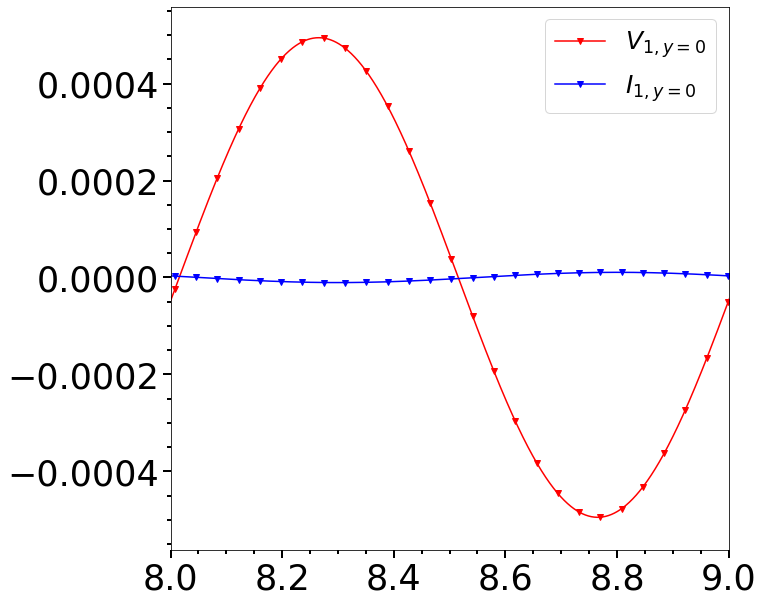

In [45]:
#print('Voltage amplitude at output port:' Vz[numYLocs_ESurf-1])
#print('Current incident at input port:' -BxForced*wPort)
#phase_diff = 
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
ax1.plot(time*freqForced,Vz[0], 'r', marker='v',markevery=44,label=r'$V_{1,y=0}$')
ax1.plot(time*freqForced,I[0], 'b', marker='v',markevery=44,label=r'$I_{1,y=0}$')

#ax1.plot(time*freqForced,EzForced*hPort, 'b', marker='v',markevery=44,label=r'$V_{1,inc}$')
#ax1.plot(time*freqForced,-BxForced*wPort, 'b', marker='v',markevery=44,label=r'$I1$')

#ax1.plot(time*freqForced,V2out_by_Iincident, 'k', marker='v',markevery=44,label=r'$V2/I1$')

ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.set_xlim(TimeStart,TimeStart+1)
ax1.legend(prop={'size': 25},loc='upper right')

<ipython-input-40-d24ca3599e0c>:3: RuntimeWarning: invalid value encountered in true_divide
  V2out_by_Iincident=Vz[numYLocs_ESurf-1]/-BxForced*wPort


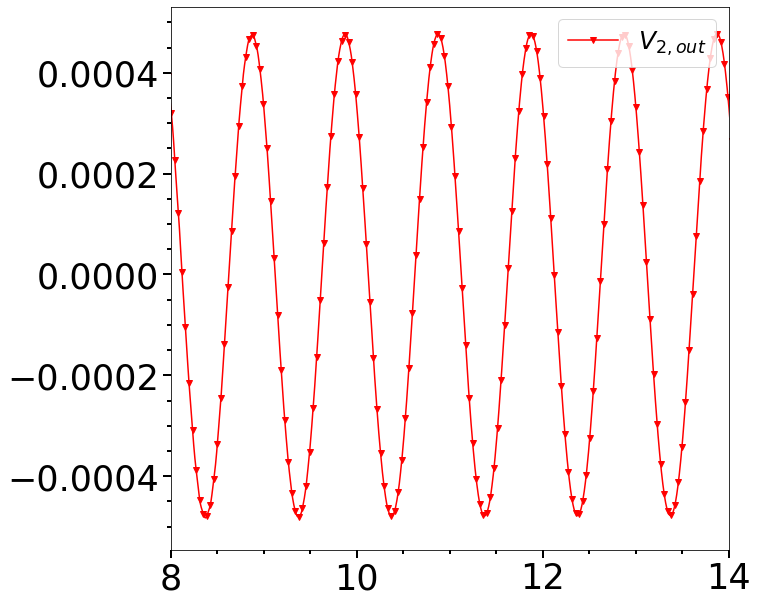

In [40]:
#print('Voltage amplitude at output port:' Vz[numYLocs_ESurf-1])
#print('Current incident at input port:' -BxForced*wPort)
V2out_by_Iincident=Vz[numYLocs_ESurf-1]/-BxForced*wPort

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(10,10)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
ax1.plot(time*freqForced,Vz[numYLocs_ESurf-1], 'r', marker='v',markevery=44,label=r'$V_{2,out}$')
#ax1.plot(time*freqForced,EzForced*hPort, 'b', marker='v',markevery=44,label=r'$V_{1,inc}$')
#ax1.plot(time*freqForced,-BxForced*wPort, 'b', marker='v',markevery=44,label=r'$I1$')

#ax1.plot(time*freqForced,V2out_by_Iincident, 'k', marker='v',markevery=44,label=r'$V2/I1$')

ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.set_xlim(TimeStart,TimeEnd)
ax1.legend(prop={'size': 25},loc='upper right')
